# Example to use Rohub from Jupyter notebook

## Install library if not present

In [1]:
pip install rohub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 3.9 MB/s  0:00:00 eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for rohub: filename=rohub-1.2.0-py3-none-any.whl size=55035 sha256=c304189d553ef3a8563e25b28e9ec504b31fd54b6b8b995b0183f396d27f3fb3
  Stored in directory: /Users/annef/Library/Caches/pip/wheels/66/59/21/74df8ec154cd6ddc0ff9f8286a56b4af919d9afd6ef341fb8b
Successfully built rohub
Note: you may need to restart the kernel to use updated packages.


## Import library

In [107]:
from pathlib import Path
import json
import rohub

## Authenticate

- you need to create ~/.config/rohub_credentials.json in your HOME directory with:

```
{
  "rohub": {
    "username": "your_rohub_username",
    "password": "your_rohub_password"
  }
}

```
- your_rohub_username: contains your rohub username
- your_rohub_password: add your password in this file

In [108]:
cred_path = Path.home() / ".config" / "rohub_credentials.json"

try:
    with cred_path.open("r", encoding="utf-8") as f:
        data = json.load(f)
    rohub_user = data["rohub"]["username"]
    rohub_pwd = data["rohub"]["password"]
except FileNotFoundError:
    raise SystemExit(f"Credentials file not found: {cred_path}")
except KeyError:
    raise SystemExit("Expected keys not found in credentials file.")
except json.JSONDecodeError:
    raise SystemExit("Credentials file is not valid JSON.")

In [109]:
rohub.login(username=rohub_user, password=rohub_pwd)

Logged successfully as annef@simula.no.


## RO methods

Whenever we create a new Research Object (RO), we need to choose a research area from the list of available research areas and select a type of Research Object, depending on what we will add in it. 
In this notebook, we will create an **Executable Research Object** in **Environmental research**. Then we will add this jupyter notebook in our executable RO to faciliate the reuse of our work. Before doing so, let's list the available **research areas** and the different **types of Research Objects**.

In [40]:
rohub.list_valid_research_areas()

['Acoustics',
 'Aerodynamics',
 'Agronomy',
 'Analytical chemistry',
 'Applied sciences',
 'Astronautics',
 'Astronomy',
 'Atom',
 'Biochemistry',
 'Biology',
 'Biometrics',
 'Botany',
 'Cartography',
 'Chemistry',
 'Climatology',
 'Cosmology',
 'Cultural geography',
 'Cybernetics',
 'Cytology',
 'Earth observation',
 'Earth sciences',
 'Ecology',
 'Economic geography',
 'Electrochemistry',
 'Electronics',
 'Electrotechnology',
 'Embryo and foetus',
 'Environmental research',
 'Fundamental particle',
 'Genetics',
 'Geochemistry',
 'Geographical information system',
 'Geography',
 'Geology',
 'Geomorphology',
 'Geophysics',
 'Hazard science',
 'Histology',
 'Historical geography',
 'Human geography',
 'Hydrogeology',
 'Hydrology',
 'Industrial chemistry',
 'Information science',
 'Ionising radiation',
 'Laser physics',
 'Life sciences',
 'Mathematics',
 'Medical science',
 'Meteorology',
 'Metrology',
 'Microorganism',
 'Mineralogy',
 'Neurobiology',
 'Nuclear physics',
 'Oceanography',

In [41]:
rohub.list_valid_ros_types()

['Basic Research Object',
 'Bibliography-centric Research Object',
 'Data-centric Research Object',
 'Executable Research Object',
 'Process-centric Research Object',
 'Service-centric Research Object',
 'Software-centric Research Object',
 'Workflow-centric Research Object']

### Create new RO

In [42]:
ro_title="FAIR2Adapt RO-Crate with Jupyter Notebook"
ro_research_areas=["Environmental research"]
ro_description="This Research Object demonstrate how to create a new RO in ROHub from Python"
ro_ros_type="Executable Research Object"

ro = rohub.ros_create(title=ro_title, research_areas=ro_research_areas, description=ro_description, ros_type=ro_ros_type, use_template=True)

Research Object was successfully created with id = b3aa0332-2954-486b-b95f-33d84af14232


In [110]:
#ro_id = "b3aa0332-2954-486b-b95f-33d84af14232"
#ro = rohub.ros_load(identifier=ro_id)

Research Object was successfully loaded with id = b3aa0332-2954-486b-b95f-33d84af14232


When successfuly created `rohub.ros_create` method returns the id of your newly created RO. 
```
Research Object was successfully created with id = XXXXX
```
You can use this RO id to access and share your RO: 
```
https://w3id.org/ro-id/XXXXX
```

You can also see the newly created RO in your list of ROs. Go to [https://www.rohub.org](https://www.rohub.org) and login with your username and password. Then check "MY ROS" tab to explore the newly created RO. You should see something similar to the image below:

![new RO in ROHub](static/newRO-rohub.png)

```{admonition} 🧩 Exercise
:class: tip

1. Check the type of Research Object (Executable RO).
2. What do the terms “*public*”, “*manual*”, and “*live*” mean?
3. Why does the Research Object we created already contain folders (`biblio`, `input`, `output`, `tool`) even though we haven’t populated it yet?

### Check basic metadata

Let's check the metadata online (similar to what we see on the ROHub web interface).

In [45]:
ro.show_metadata()

{'identifier': 'b3aa0332-2954-486b-b95f-33d84af14232',
 'shared_link': 'https://w3id.org/ro-id/b3aa0332-2954-486b-b95f-33d84af14232',
 'title': 'FAIR2Adapt RO-Crate with Jupyter Notebook',
 'description': 'This Research Object demonstrate how to create a new RO in ROHub from Python',
 'parent_ro': None,
 'status': 'LIVE',
 'access_mode': 'PUBLIC',
 'type': 'Executable Research Object',
 'template': 'Executable Research Object folders structure',
 'created': '2025-10-06T17:47:45.054167Z',
 'creator': 'annef@simula.no',
 'modified': '2025-10-06T17:47:45.244323Z',
 'modificator': 'annef@simula.no',
 'importer': None,
 'research_areas': ['Environmental research'],
 'owner': 'annef@simula.no',
 'editors': [],
 'readers': [],
 'rating': '0.00',
 'number_of_ratings': 0,
 'number_of_likes': 0,
 'number_of_dislikes': 0,
 'completeness': 0.0,
 'size': 0,
 'creation_mode': 'MANUAL',
 'doi': None,
 'resource_storage': 'DEFAULT',
 'api_link': 'https://api.rohub.org/api/ros/b3aa0332-2954-486b-b95f-3

### Add/modify basic metadata


Let's change the description of the Research Object and add another editor to give write access to your RO. We want the description to contain information on the FAIR2Adapt Case Study we are working on. 

```{admonition} Update Case study number!
:class: warning
Update the description with your case study number before executing the cell below.


In [46]:
ro.description="This Research Object is an example for FAIR2Adapt Case Study 2"
#ro.editors = "annef@simula.no torill.hamre@nersc.no"
ro.update()

{'identifier': 'b3aa0332-2954-486b-b95f-33d84af14232',
 'shared_link': 'https://w3id.org/ro-id/b3aa0332-2954-486b-b95f-33d84af14232',
 'title': 'FAIR2Adapt RO-Crate with Jupyter Notebook',
 'description': 'This Research Object is an example for FAIR2Adapt Case Study 2',
 'parent_ro': None,
 'status': 'LIVE',
 'access_mode': 'PUBLIC',
 'type': 'Executable Research Object',
 'template': 'Executable Research Object folders structure',
 'created': '2025-10-06T17:47:45.054167Z',
 'creator': 'annef@simula.no',
 'modified': '2025-10-06T17:48:45.378653Z',
 'modificator': 'annef@simula.no',
 'importer': None,
 'research_areas': ['Environmental research'],
 'owner': 'annef@simula.no',
 'editors': [],
 'readers': [],
 'rating': '0.00',
 'number_of_ratings': 0,
 'number_of_likes': 0,
 'number_of_dislikes': 0,
 'completeness': 0.0,
 'size': 0,
 'creation_mode': 'MANUAL',
 'doi': None,
 'resource_storage': 'DEFAULT',
 'api_link': 'https://api.rohub.org/api/ros/b3aa0332-2954-486b-b95f-33d84af14232/'}

```{admonition} 🧩 Exercise
:class: tip

Check the metadata to ensure that your recent changes were successfully applied.  

### List RO Folders

In [48]:
myfolders = ro.list_folders()
myfolders

,identifier,name,path,description,created_on,modified_on,creator
0,fc4a4b19-52fd-49bb-ad06-4a0214d1405d,biblio,biblio,None,2025-10-06T17:47:45.577051+0000,2025-10-06T17:47:45.578736+0000,annef@simula.no
1,2cb0beb4-d55e-4fa5-b9c2-911babd47aac,input,input,None,2025-10-06T17:47:45.577440+0000,2025-10-06T17:47:45.578834+0000,annef@simula.no
2,bb812fa3-2545-4327-b87b-90d63b95940c,output,output,None,2025-10-06T17:47:45.577718+0000,2025-10-06T17:47:45.578897+0000,annef@simula.no
3,c89896af-e69c-4e98-a77f-65037351b3ed,tool,tool,None,2025-10-06T17:47:45.577978+0000,2025-10-06T17:47:45.578958+0000,annef@simula.no


### Aggregate resource (internal)

Let's first create a simple image that we will add in our RO. Feel free to take another image that illustrates your case study.

In [49]:
from PIL import Image, ImageDraw

# Create a blank image
img = Image.new("RGB", (200, 200), color="white")

# Create a drawing object
draw = ImageDraw.Draw(img)

# Draw a red rectangle
draw.rectangle([50, 50, 150, 150], fill="red")

# Draw a blue ellipse
draw.ellipse([70, 70, 130, 130], fill="blue")

# Save
img.save("my_drawing.png")


In [52]:
resi_res_type="Sketch"
resi_file_path="my_drawing.png"
resi_title="Image to illustrate my case study"
resi_folder="input"

my_res_int0=ro.add_internal_resource(res_type=resi_res_type,file_path=resi_file_path, title=resi_title, folder=resi_folder)


Resource was successfully created with id = 8567315a-bd16-4af9-a458-62773e6f0fc9


### Aggregate resouce (external)

1. Add an external image (not as a sketch but as an Image)
2. Add a Jupyter Notebook

In [56]:
rese_res_type="Image"
rese_file_url="https://raw.githubusercontent.com/FAIR2Adapt/saarland-flooding/refs/heads/main/static/flood_in_saarland_with_jqgis.png"
rese_title="flood in saarland with JupyterGIS"
rese_description="Example for FAIR2Adapt training on RO-Crate and ROHub"

ro.add_external_resource(res_type=rese_res_type, input_url=rese_file_url, title=rese_title, description= rese_description, folder="output")


Resource was successfully created with id = 72b547cf-f9e1-42ce-82ac-3e87926b39e3


Resource(identifier=72b547cf-f9e1-42ce-82ac-3e87926b39e3, post_request=False)

Let's add the corresponding Jupyter Notebook

In [57]:
rese_res_type="Jupyter Notebook"
rese_file_url="https://raw.githubusercontent.com/FAIR2Adapt/saarland-flooding/refs/heads/main/notebooks/Flood_protection_line_Saarland.ipynb"
rese_title="Flood analysis with JupterGIS"
rese_description="Visualizing Generalized Flood Areas for HQ100 Event and relate to an existing flooding event."

my_res_ext0=ro.add_external_resource(res_type=rese_res_type, input_url=rese_file_url, title=rese_title, description=rese_description, folder="tool")


Resource was successfully created with id = b588be83-57aa-4763-92b3-b6cdc320b56b


### List RO resources

In [58]:
ro.list_resources()

,identifier,type,source,title,description,url,name,path,size,creator,created_on,modified_on,download_url
0,b588be83-57aa-4763-92b3-b6cdc320b56b,Jupyter Notebook,external,Flood analysis with JupterGIS,Visualizing Generalized Flood Areas for HQ100 ...,https://raw.githubusercontent.com/FAIR2Adapt/s...,Flood analysis with JupterGIS,https://raw.githubusercontent.com/FAIR2Adapt/s...,NaN,annef@simula.no,2025-10-06T18:12:44.130381+0000,2025-10-06T18:12:44.834625+0000,https://api.rohub.org/api/resources/b588be83-5...
1,72b547cf-f9e1-42ce-82ac-3e87926b39e3,Image,external,flood in saarland with JupyterGIS,Example for FAIR2Adapt training on RO-Crate an...,https://raw.githubusercontent.com/FAIR2Adapt/s...,flood in saarland with JupyterGIS,https://raw.githubusercontent.com/FAIR2Adapt/s...,NaN,annef@simula.no,2025-10-06T18:12:39.131086+0000,2025-10-06T18:12:39.848325+0000,https://api.rohub.org/api/resources/72b547cf-f...
2,8567315a-bd16-4af9-a458-62773e6f0fc9,Sketch,internal,Image to illustrate my case study,None,None,Image to illustrate my case study,input/my_drawing.png,907.0,annef@simula.no,2025-10-06T17:57:19.927326+0000,2025-10-06T17:57:23.062757+0000,https://api.rohub.org/api/resources/8567315a-b...


### Add geolocation
- You can add a geojson ld file or directly its content here
```
ro.add_geolocation(body_specification_json="/home/jovyan/ROHub-API/files/EuropeBOX.geojson")
ro.add_geolocation(body_specification_json="/home/jovyan/ROHub-API/files/fra.geo-ld.json")
ro.add_geolocation(body_specification_json="/home/jovyan/ROHub-API/files/geojson-test-simple_mp.json")
```
- In the example below, we direcly add the content (one single location)

In [59]:
geojson_bbox = {
    "@context": {
        "geojson": "https://purl.org/geojson/vocab#"
    },
    "type": "Feature",
    "geometry": {
        "type": "Polygon",
        "coordinates": [[
            [6.31, 49.1],   # SW corner
            [6.31, 49.64],  # NW corner
            [7.41, 49.64],  # NE corner
            [7.41, 49.1],   # SE corner
            [6.31, 49.1]    # Close polygon back to SW
        ]]
    }
}

ro.add_geolocation(body_specification_json=geojson_bbox)

{'identifier': '5cce5686-4671-46ca-98e1-2c1f45263678',
 'shared_link': 'https://w3id.org/ro-id/b3aa0332-2954-486b-b95f-33d84af14232/annotations/5cce5686-4671-46ca-98e1-2c1f45263678',
 'name': 'annotations/5cce5686-4671-46ca-98e1-2c1f45263678',
 'filename': '.ro/annotations/5cce5686-4671-46ca-98e1-2c1f45263678.ttl',
 'relation': False,
 'read_only': False,
 'target': 'b3aa0332-2954-486b-b95f-33d84af14232',
 'ro': 'b3aa0332-2954-486b-b95f-33d84af14232',
 'resources': [],
 'created': '2025-10-06T18:14:49.697947+0000',
 'creator': 'annef@simula.no',
 'modificator': None,
 'modified': '2025-10-06T18:14:49.697902+0000',
 'is_dmp': True,
 'api_link': 'https://api.rohub.org/api/annotations/5cce5686-4671-46ca-98e1-2c1f45263678/'}

### Export to RO-crate

In [60]:
#ro.export_to_rocrate(filename="my-ro-crate")
ro.export_to_rocrate(filename="my-ro-crate", use_format="zip")

File was successfully downloaded.


## Add authors/contributors/publishers/copyrightHolders

### List users

In [111]:
usernames = rohub.users_find(search="Ines")
usernames

,identifier,username,display_name,affiliation,description,areas_of_interest,orcid_identifier,external
0,b21e63e2-c8cd-4de3-8bed-2055fac27dbc,igmarques@fc.ul.pt,Ines Gomes Marques,"Centre for Ecology, Evolution and Environmenta...",Scientific Researcher in Climate Change Adapta...,Climate Change Adaptation\r\nForestry,0000-0002-2104-3187,False


In [112]:
agents = [usernames.iloc[0][["orcid_identifier"]].to_dict()]
print(agents)

[{'orcid_identifier': '0000-0002-2104-3187'}]


### Add authors/contributors

In [113]:
ro.set_authors(agents=agents)

#ro.set_authors(agents=["dontdoit@lochness.uk"])

SystemExit: Missing data! When providing agent data, please make sure that you are providing either orcid_id/ror_identifier fields for user/organization respectively or email! At least one of those has to be provided!

/Users/annef/mamba/envs/eopf-zarr/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [114]:
#ro.set_contributors(agents=[{"user_id":"rapnonexist_3@hotmail.com", 
#                             "display_name": "Pepito Bato", 
#                             "email":"example3@hotmail.com",
#                             "orcid_id":"0000-0002-8316-3192",
#                             "affiliation": "PCSS"}])


### List organizations

In [115]:
organizations=rohub.organizations_find(search="poznan")
organizations

,identifier,organization_id,display_name,email,url,ror_identifier,highlight,score
0,c86c4fae-1560-4575-b9f3-026d2a4aa1be,https://w3id.org/ro-id/organizations/openaire:...,"Instytut Chemii Bioorganicznej PAN, Poznanskie...",None,None,None,{'display_name': ['Instytut Chemii Bioorganicz...,None
1,64ec5402-1171-42f6-b9dd-6fa901ca9724,https://ror.org/025cj6e44,Poznan Supercomputing and Networking Center,office@man.poznan.pl,https://www.psnc.pl/,025cj6e44,{'display_name': ['<b>Poznan</b> Supercomputin...,None
2,ee9d7ea1-039e-4e52-8f06-4c2255417785,https://w3id.org/ro-id/organizations/openaire:...,Poznan Supercomputing and Networking Center,None,None,None,{'display_name': ['<b>Poznan</b> Supercomputin...,None
3,cd90006a-a3fe-410d-9192-f6c43f3f4c2d,https://w3id.org/ro-id/organizations/openaire:...,Poznan Supercomputing and Networking Center,None,None,None,{'display_name': ['<b>Poznan</b> Supercomputin...,None
4,52db6633-735f-4595-a296-3e46aa45918a,https://w3id.org/ro-id/organizations/ROR:https...,Poznan Supercomputing and Networking Center,None,None,None,{'display_name': ['<b>Poznan</b> Supercomputin...,None


### Add publisher/copyright holder

In [116]:
ro.set_publishers(agents=[organizations.loc[0,"organization_id"]])

Agent: https://w3id.org/ro-id/organizations/openaire:pending_org_::e54c9ed8a323c5b26dcc8358a0fbf345 recognized in the system.


[{'identifier': 'c86c4fae-1560-4575-b9f3-026d2a4aa1be',
  'username': 'https://w3id.org/ro-id/organizations/openaire:pending_org_::e54c9ed8a323c5b26dcc8358a0fbf345',
  'name': 'https://w3id.org/ro-id/organizations/openaire:pending_org_::e54c9ed8a323c5b26dcc8358a0fbf345',
  'type': 'Organization',
  'order': 0,
  'display_name': 'Instytut Chemii Bioorganicznej PAN, Poznanskie Centrum Superkomputerowo-Sieciowe PSNC'}]

In [117]:
ro.set_copyright_holders(agents=[{"org_id":"https://neic.no/",
                    "display_name": "Nordic e-Infrastructure Collaboration", 
                     "agent_type": "organization",
                    "ror_identifier":"04jcwf484",
                    "organization_url": "https://neic.no/"}])

Agent: {'org_id': 'https://neic.no/', 'display_name': 'Nordic e-Infrastructure Collaboration', 'agent_type': 'organization', 'ror_identifier': '04jcwf484', 'organization_url': 'https://neic.no/'} recognized in the system.


[{'identifier': 'fbd9bdcf-4a1d-4ae8-9a90-6b9ec5a3b8b2',
  'username': 'https://ror.org/04jcwf484',
  'name': 'https://ror.org/04jcwf484',
  'type': 'Organization',
  'order': 0,
  'display_name': 'Nordic e-Infrastructure Collaboration'}]

## Add RO license

### list available pre-defined licenses

In [118]:
rohub.list_available_licenses()

['0bsd',
 'BSD 3-Clause',
 'BSD-3-Clause',
 'CEECIND 2021',
 'NLOD 2.0',
 'aal',
 'abstyles',
 'acme-cc',
 'acme-cc-by',
 'adobe-2006',
 'adobe-glyph',
 'adsl',
 'afl-1.1',
 'afl-1.2',
 'afl-2.0',
 'afl-2.1',
 'afl-3.0',
 'afmparse',
 'against-drm',
 'agpl-1.0-only',
 'agpl-1.0-or-later',
 'agpl-3.0-only',
 'agpl-3.0-or-later',
 'aladdin',
 'amdplpa',
 'aml',
 'ampas',
 'antlr-pd',
 'antlr-pd-fallback',
 'apache-1.0',
 'apache-1.1',
 'apache-2.0',
 'apafml',
 'apl-1.0',
 'apsl-1.0',
 'apsl-1.1',
 'apsl-1.2',
 'apsl-2.0',
 'artistic-1.0',
 'artistic-1.0-cl8',
 'artistic-1.0-perl',
 'artistic-2.0',
 'bahyph',
 'barr',
 'beerware',
 'bittorrent-1.0',
 'bittorrent-1.1',
 'blessing',
 'blueoak-1.0.0',
 'borceux',
 'bsd-1-clause',
 'bsd-2-clause',
 'bsd-2-clause-patent',
 'bsd-2-clause-views',
 'bsd-3-clause',
 'bsd-3-clause-attribution',
 'bsd-3-clause-clear',
 'bsd-3-clause-lbnl',
 'bsd-3-clause-no-nuclear-license',
 'bsd-3-clause-no-nuclear-license-2014',
 'bsd-3-clause-no-nuclear-warrant

### set license

In [119]:
ro.set_license(license_id=rohub.list_available_licenses()[0]) 

{'identifier': '0bsd',
 'title': 'BSD Zero Clause License',
 'description': 'BSD Zero Clause License',
 'created': '2023-10-12T17:24:14.997270+00:00',
 'updated': '2023-10-12T17:24:15.195823+00:00',
 'creator': None,
 'status': 'osi_approved',
 'url': 'http://landley.net/toybox/license.html',
 'custom': False}

In [120]:
rohub.list_valid_license_status()

['active', 'retired']

In [121]:
rohub.list_custom_licenses() 

[{'identifier': 'acme-cc',
  'title': 'ACME Inc. Commercial License',
  'description': None,
  'status': 'active',
  'url': 'http://www.acme.org/licence-commercial',
  'created': '2021-12-09T13:54:10.927006Z',
  'updated': None,
  'creator': 'rpalma@man.poznan.pl',
  'api_link': 'https://api.rohub.org/api/custom-licenses/acme-cc/'},
 {'identifier': 'acme-cc-by',
  'title': 'ACME Inc. Commercial License Attribution',
  'description': None,
  'status': 'active',
  'url': 'http://www.acme.org/licence-commercial-attribution',
  'created': '2022-02-17T20:23:57.673731Z',
  'updated': None,
  'creator': 'rpalma@man.poznan.pl',
  'api_link': 'https://api.rohub.org/api/custom-licenses/acme-cc-by/'},
 {'identifier': 'BSD 3-Clause',
  'title': 'Berkeley Source Distribution 3-Clause "New" or "Revised" License',
  'description': 'Note: This license has also been called the “New BSD License” or “Modified BSD License”. See also the 2-clause BSD License.',
  'status': 'active',
  'url': 'https://opens

## Add RO Funding information

### list predefined funders

In [129]:
rohub.zenodo_list_funders(query="European")

,identifiers,title,types,country,created,updated
0,"[{'identifier': '036hkvc70', 'scheme': 'ror'},...",Europeana Foundation,[nonprofit],NL,2023-10-03T07:55:35.131991+00:00,2024-12-03T13:10:45.101229+00:00
1,"[{'identifier': '04g08bx14', 'scheme': 'ror'},...",European University,[education],GE,2024-10-04T10:02:29.902204+00:00,2024-12-03T13:34:56.961018+00:00
2,"[{'identifier': '04gpw1v92', 'scheme': 'ror'},...",European University,[education],MK,2023-10-03T07:55:35.621237+00:00,2024-12-03T13:15:08.816513+00:00
3,"[{'identifier': '05w2mtm47', 'scheme': 'ror'},...",Universitatea Europeană Drăgan,[education],RO,2023-10-03T07:55:35.616679+00:00,2024-12-03T13:35:07.306894+00:00
4,"[{'identifier': '02jam4v16', 'scheme': 'ror'},...",EuroSpine,"[facility, funder]",CH,2023-10-03T07:55:37.559612+00:00,2024-12-03T13:32:15.559165+00:00
...,...,...,...,...,...,...
676,"[{'identifier': '0533xhs39', 'scheme': 'ror'},...",European Underground Research Infrastructure f...,[other],BE,2023-10-03T07:55:37.701674+00:00,2024-12-03T13:33:17.342788+00:00
677,"[{'identifier': '036egt138', 'scheme': 'ror'}]",European Institute for Multidisciplinary Studi...,[nonprofit],DE,2023-10-03T07:55:37.630464+00:00,2024-12-03T13:32:41.776020+00:00
678,"[{'identifier': '015r8jj75', 'scheme': 'ror'},...",The European Institute for Crime Prevention an...,[facility],FI,2023-10-03T07:55:36.862592+00:00,2024-12-03T13:26:26.912858+00:00
679,"[{'identifier': '003xvvt95', 'scheme': 'ror'},...","Institute for German, European and Internation...",[facility],DE,2023-10-03T07:55:37.227655+00:00,2024-12-03T13:29:41.746292+00:00


### set funding

In [130]:
grant_id="101188256"
grant_Name="FAIR2Adapt"
grant_title="FAIR to Adapt to Climate Change"
funder_name="European Commission"
funder_doi="10.3030/101188256"

ro.add_funding(grant_identifier=grant_id, grant_name=grant_Name, funder_name=funder_name,
grant_title=grant_title, funder_doi=funder_doi)

'bbefc9e7-d463-4988-84ca-728d5fd8228a'

## RO Evolution

### Create simple snapshot/archive
- Uncomment the lines below if you really want to create a snapshot.
- We usually recommend to create snapshot of real scientific work, corresponding for instance at a milestone in your work.

In [131]:
# snapshot_id=ro.snapshot()
# snapshot_id

### Create snapshot/archive, optionally assign DOI + publish it in Zenodo

In [36]:
snapshot_title="Case Study RO - published v1"
# Uncomment the line below to publish in zenodo and get a DOI
# snapshot_id_pub=ro.snapshot(title=snapshot_title, create_doi=True, publication_services=["Zenodo"])
#snapshot_id_pub

#### Load published snapshot/archive and list zenodo id/doi

In [137]:
#snapshot_id_pub = '57cf76e1-2179-4650-b48b-b5990dca86c1'
#published_ro = rohub.ros_load(identifier=snapshot_id_pub)
#published_ro.list_publications()

### Fork existing RO to reuse it for my own purposes

In [42]:
fork_id=ro.fork(title="Forked RO")
forked_ro = rohub.ros_load(identifier=fork_id)
forked_ro.show_metadata()
#%time fork_id=ro.fork()

Trying to confirm status of the job. It can take a while...
Research Object was successfully loaded with id = 21116679-72c9-4751-8db1-82c558dfa879


{'identifier': '21116679-72c9-4751-8db1-82c558dfa879',
 'shared_link': 'https://w3id.org/ro-id/21116679-72c9-4751-8db1-82c558dfa879',
 'title': 'Forked Copernicus Atmosphere Monitoring Service Data Cube RO December 8th',
 'description': 'This Research Object demonstrate how to compute monthly map of PM10 over your country - modified',
 'status': 'FORK',
 'access_mode': 'PUBLIC',
 'type': 'Data-centric Research Object',
 'template': 'Data Centric Research Object folders structure',
 'created': '2022-01-23T11:25:52.956418Z',
 'creator': 'annefou@geo.uio.no',
 'modificator': None,
 'modified': '2022-01-23T11:31:29.276408Z',
 'importer': None,
 'research_areas': ['Earth sciences'],
 'owner': 'annefou@geo.uio.no',
 'editors': ['annefou@geo.uio.no', 'dario.stelitano@ingv.it'],
 'readers': [],
 'rating': '0.00',
 'number_of_ratings': 0,
 'number_of_likes': 0,
 'number_of_dislikes': 0,
 'quality': 0,
 'size': 0,
 'creation_mode': 'MANUAL',
 'doi': None,
 'api_link': 'https://api.rohub.org/api/

## Resource methods

### Load resource

In [133]:
results=ro.list_resources()
results

,identifier,type,source,title,description,url,name,path,size,creator,created_on,modified_on,download_url
0,b588be83-57aa-4763-92b3-b6cdc320b56b,Jupyter Notebook,external,Flood analysis with JupterGIS,Visualizing Generalized Flood Areas for HQ100 ...,https://raw.githubusercontent.com/FAIR2Adapt/s...,Flood analysis with JupterGIS,https://raw.githubusercontent.com/FAIR2Adapt/s...,NaN,annef@simula.no,2025-10-06T18:12:44.130381+0000,2025-10-06T18:12:44.834625+0000,https://api.rohub.org/api/resources/b588be83-5...
1,72b547cf-f9e1-42ce-82ac-3e87926b39e3,Image,external,flood in saarland with JupyterGIS,Example for FAIR2Adapt training on RO-Crate an...,https://raw.githubusercontent.com/FAIR2Adapt/s...,flood in saarland with JupyterGIS,https://raw.githubusercontent.com/FAIR2Adapt/s...,NaN,annef@simula.no,2025-10-06T18:12:39.131086+0000,2025-10-06T18:12:39.848325+0000,https://api.rohub.org/api/resources/72b547cf-f...
2,8567315a-bd16-4af9-a458-62773e6f0fc9,Sketch,internal,Image to illustrate my case study,None,None,Image to illustrate my case study,input/my_drawing.png,907.0,annef@simula.no,2025-10-06T17:57:19.927326+0000,2025-10-06T17:57:23.062757+0000,https://api.rohub.org/api/resources/8567315a-b...


In [134]:
my_res1=rohub.resource_load(identifier=results.loc[1,"identifier"])

Resource was successfully loaded with id = 72b547cf-f9e1-42ce-82ac-3e87926b39e3


### show basic metadata

In [135]:
my_res1.show_metadata()

{'identifier': '72b547cf-f9e1-42ce-82ac-3e87926b39e3',
 'type': 'Image',
 'source': 'external',
 'title': 'flood in saarland with JupyterGIS',
 'description': 'Example for FAIR2Adapt training on RO-Crate and ROHub',
 'url': 'https://raw.githubusercontent.com/FAIR2Adapt/saarland-flooding/refs/heads/main/static/flood_in_saarland_with_jqgis.png',
 'folder': 'output',
 'path': 'https://raw.githubusercontent.com/FAIR2Adapt/saarland-flooding/refs/heads/main/static/flood_in_saarland_with_jqgis.png',
 'size': None,
 'creator': 'annef@simula.no',
 'created_on': '2025-10-06T18:12:39.131086+0000',
 'modified_on': '2025-10-06T18:12:39.848325+0000',
 'download_url': 'https://api.rohub.org/api/resources/72b547cf-f9e1-42ce-82ac-3e87926b39e3/download/'}

### Add/modify metadata

In [136]:
my_res1.title="Image - updated"
my_res1.description="This resource has this description"
my_res1.update_metadata()

{'title': 'Image - updated',
 'folder': 'bb812fa3-2545-4327-b87b-90d63b95940c',
 'description': 'This resource has this description',
 'type': 'Image'}

### Modify content (internal resource)

In [138]:
import urllib.request

url = "https://raw.githubusercontent.com/FAIR2Adapt/saarland-flooding/refs/heads/main/static/logo.png"
urllib.request.urlretrieve(url, "fair2adapt-logo.png")
print("Downloaded to logo.png")

resi_file_path="fair2adapt-logo.png"
my_res1.update_content(file_path=resi_file_path)

Downloaded to logo.png


{'identifier': '72b547cf-f9e1-42ce-82ac-3e87926b39e3',
 'shared_link': 'https://w3id.org/ro-id/b3aa0332-2954-486b-b95f-33d84af14232/resources/72b547cf-f9e1-42ce-82ac-3e87926b39e3',
 'title': 'Image - updated',
 'folder': 'bb812fa3-2545-4327-b87b-90d63b95940c',
 'ros': ['b3aa0332-2954-486b-b95f-33d84af14232'],
 'description': 'This resource has this description',
 'url': 'https://raw.githubusercontent.com/FAIR2Adapt/saarland-flooding/refs/heads/main/static/flood_in_saarland_with_jqgis.png',
 'name': 'Image - updated',
 'filename': 'fair2adapt-logo.png',
 'path': 'https://raw.githubusercontent.com/FAIR2Adapt/saarland-flooding/refs/heads/main/static/flood_in_saarland_with_jqgis.png',
 'size': None,
 'download_url': 'https://api.rohub.org/api/resources/72b547cf-f9e1-42ce-82ac-3e87926b39e3/download/',
 'open_url': None,
 'type': 'Image',
 'order': 58334,
 'created_on': '2025-10-06T18:12:39.131086+0000',
 'created_by': 'annef@simula.no',
 'modified_on': '2025-10-06T18:49:46.490950+0000',
 'm

### Modify content (external resource)

In [139]:
my_res1_ext=rohub.resource_load(identifier=results.loc[0,"identifier"])
rese_file_url="https://raw.githubusercontent.com/FAIR2Adapt/saarland-flooding/refs/heads/main/notebooks/Hamburg_urban_data_portal_WFS.ipynb"
my_res1_ext.update_content(input_url=rese_file_url)

Resource was successfully loaded with id = b588be83-57aa-4763-92b3-b6cdc320b56b


{'identifier': 'b588be83-57aa-4763-92b3-b6cdc320b56b',
 'shared_link': 'https://w3id.org/ro-id/b3aa0332-2954-486b-b95f-33d84af14232/resources/b588be83-57aa-4763-92b3-b6cdc320b56b',
 'title': 'Flood analysis with JupterGIS',
 'folder': 'c89896af-e69c-4e98-a77f-65037351b3ed',
 'ros': ['b3aa0332-2954-486b-b95f-33d84af14232'],
 'description': 'Visualizing Generalized Flood Areas for HQ100 Event and relate to an existing flooding event.',
 'url': 'https://raw.githubusercontent.com/FAIR2Adapt/saarland-flooding/refs/heads/main/notebooks/Hamburg_urban_data_portal_WFS.ipynb',
 'name': 'Flood analysis with JupterGIS',
 'filename': None,
 'path': 'https://raw.githubusercontent.com/FAIR2Adapt/saarland-flooding/refs/heads/main/notebooks/Hamburg_urban_data_portal_WFS.ipynb',
 'size': None,
 'download_url': 'https://api.rohub.org/api/resources/b588be83-57aa-4763-92b3-b6cdc320b56b/download/',
 'open_url': 'https://api.rohub.org/api/resources/b588be83-57aa-4763-92b3-b6cdc320b56b/open/',
 'type': 'Jupyt

### Retrieve resource

In [143]:
file=my_res1.download(resource_filename="resource.png")


File was successfully downloaded.


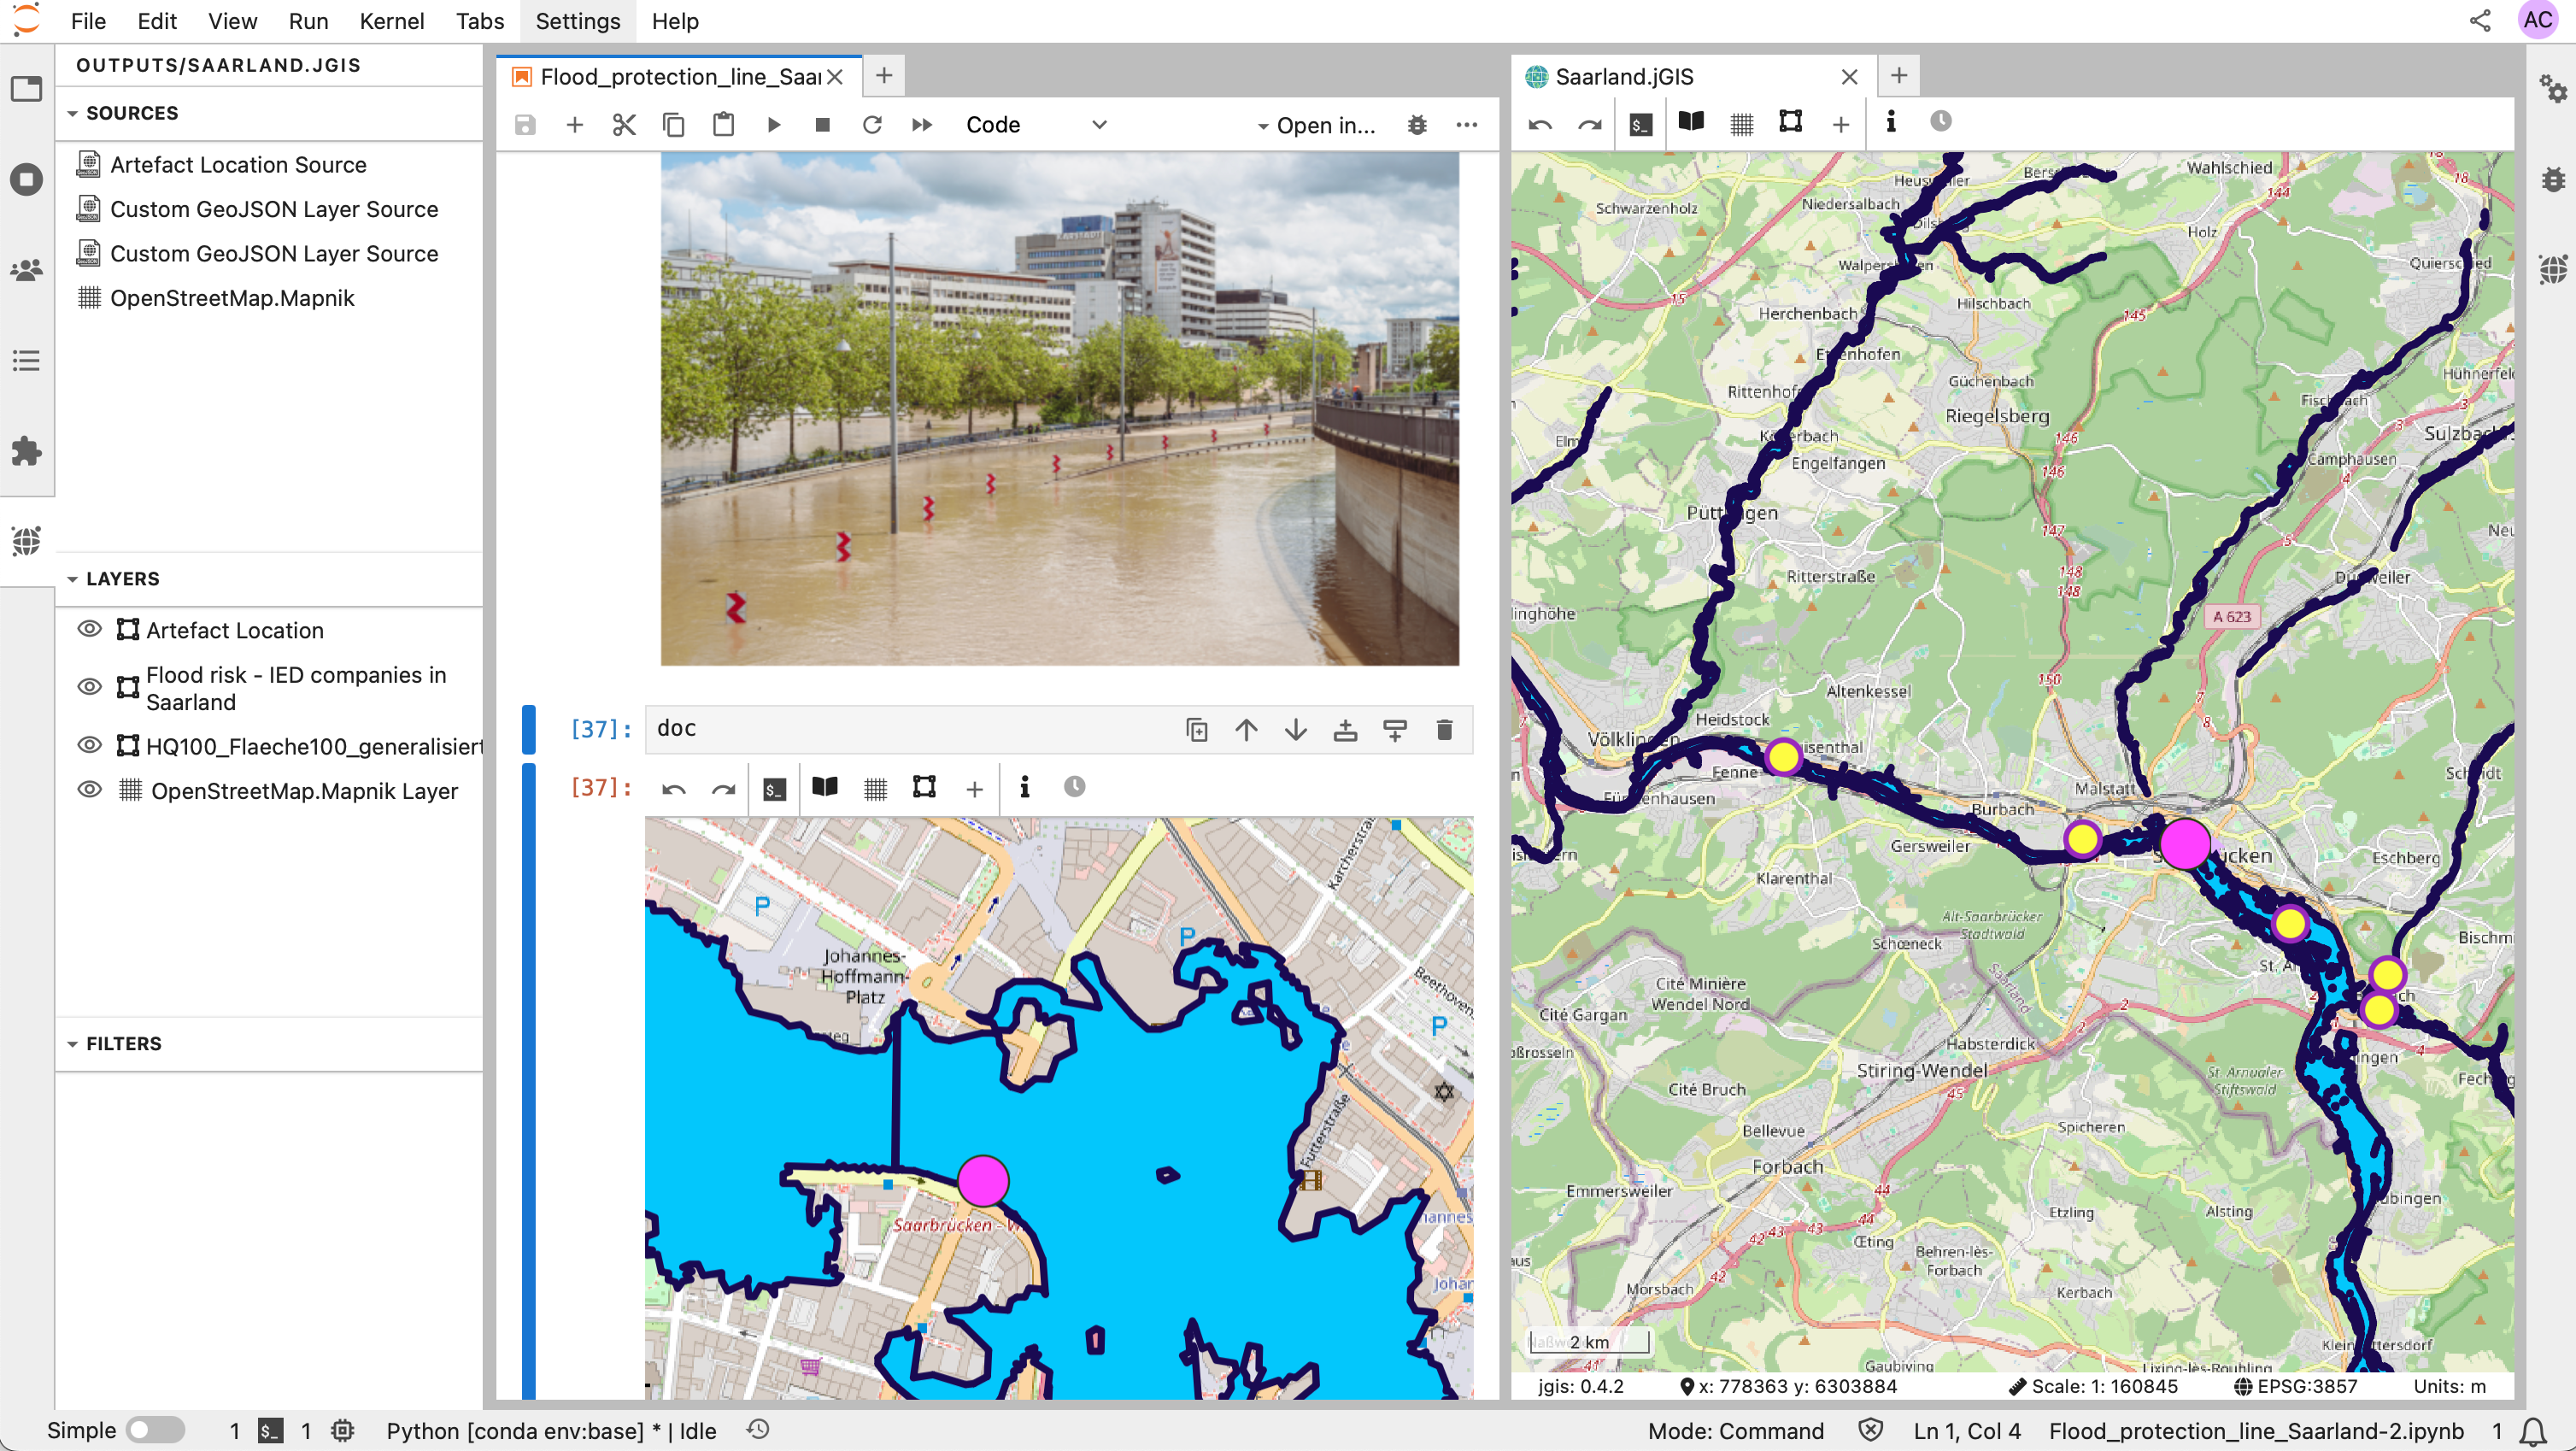

In [144]:
from IPython.display import Image
Image(filename=file) 

### Assign DOI
- uncomment if you want to assign a DOI. Please, bear in mind that DOI should only be assigned for "real" scientific work!

In [61]:
# my_res1_ext.assign_doi()

## Utils

### remove RO

In [62]:
forked_ro.delete()
#ro_id_to_delete="55a0fbe5-fde3-40cb-9ea0-1eacd3cda8d1"
#rohub.ros_delete(identifier=ro_id_to_delete)

Trying to confirm status of the job. It can take a while...


{'identifier': '1442c3cc-eae4-4e26-bf56-75e7376320cd',
 'created_by': 'annefou@geo.uio.no',
 'created_on': '2022-01-23T11:34:29.734163+0000',
 'started_on': '2022-01-23T11:34:29.778191+0000',
 'finished_on': '2022-01-23T11:34:32.876462+0000',
 'operation': 'RO_DELETE',
 'status': 'SUCCESS',
 'input': 'RO identifier for remove: 21116679-72c9-4751-8db1-82c558dfa879',
 'output': 'Task done successfully',
 'results': '21116679-72c9-4751-8db1-82c558dfa879',
 'warnings': None,
 'execution': '3.098271',
 'api_link': 'https://api.rohub.org/api/jobs/1442c3cc-eae4-4e26-bf56-75e7376320cd/'}

### show user id

In [63]:
rohub.show_user_id()

'62277187-0f2e-4320-a6b0-7fe467f1b1c1'

### show possible values for RO types, Resources types, templates, etc.

In [64]:
rohub.list_valid_research_areas()

['Acoustics',
 'Aerodynamics',
 'Agronomy',
 'Analytical chemistry',
 'Applied sciences',
 'Astronautics',
 'Astronomy',
 'Atom',
 'Biochemistry',
 'Biology',
 'Biometrics',
 'Botany',
 'Cartography',
 'Chemistry',
 'Climatology',
 'Cosmology',
 'Cultural geography',
 'Cybernetics',
 'Cytology',
 'Earth observation',
 'Earth sciences',
 'Ecology',
 'Economic geography',
 'Electrochemistry',
 'Electronics',
 'Electrotechnology',
 'Embryo and foetus',
 'Environmental research',
 'Fundamental particle',
 'Genetics',
 'Geochemistry',
 'Geographical information system',
 'Geography',
 'Geology',
 'Geomorphology',
 'Geophysics',
 'Hazard science',
 'Histology',
 'Historical geography',
 'Human geography',
 'Hydrogeology',
 'Hydrology',
 'Industrial chemistry',
 'Information science',
 'Ionising radiation',
 'Laser physics',
 'Life sciences',
 'Mathematics',
 'Medical science',
 'Meteorology',
 'Metrology',
 'Microorganism',
 'Mineralogy',
 'Neurobiology',
 'Nuclear physics',
 'Oceanography',

In [65]:
rohub.list_valid_ros_types()

['Basic Research Object',
 'Bibliography-centric Research Object',
 'Data-centric Research Object',
 'Executable Research Object',
 'Process-centric Research Object',
 'Service-centric Research Object',
 'Software-centric Research Object',
 'Workflow-centric Research Object']

In [66]:
rohub.list_valid_publication_services()

['B2SHARE', 'ZENODO']

In [67]:
rohub.list_valid_resource_types()

['Beanshell Script',
 'Bibliographic Resource',
 'Command Line Tool',
 'Conclusion',
 'Dataset',
 'Document',
 'Example Run',
 'File',
 'Hypothesis',
 'Image',
 'Meeting Minutes',
 'Paper',
 'PROCESS',
 'Process Run',
 'Prospective Run',
 'Python Script',
 'REST Service',
 'R Script',
 'Research Question',
 'Result',
 'Result Generation Run',
 'SOAP Service',
 'Script',
 'Sketch',
 'Web Service',
 'Workflow',
 'Workflow Definition',
 'Workflow Run',
 'Data Cube Collection',
 'Data Cube Product',
 'Audio',
 'Computational workflow',
 'Course',
 'Creative work',
 'How to',
 'Jupyter Notebook',
 'Other',
 'Physical object',
 'Poster',
 'Presentation',
 'Publication',
 'Research Object',
 'Software',
 'Software source code',
 'Video']

In [68]:
rohub.list_valid_creation_modes()

['MANUAL', 'IMPORTED', 'AUTOMATIC']

In [69]:
rohub.list_valid_access_modes()

['PUBLIC', 'PRIVATE', 'OPEN']

In [70]:
rohub.list_custom_licenses()

[{'identifier': 'acme-cc',
  'title': 'ACME Inc. Commercial License',
  'description': None,
  'status': 'active',
  'url': 'http://www.acme.org/licence-commercial',
  'created': '2021-12-09T13:54:10.927006Z',
  'updated': None,
  'creator': 'rpalma@man.poznan.pl',
  'api_link': 'https://api.rohub.org/api/custom-licenses/acme-cc/'},
 {'identifier': 'my-example-license1',
  'title': 'My example license',
  'description': 'this is an example license',
  'status': 'active',
  'url': 'http://myexample.org/license',
  'created': '2021-11-08T16:18:29.048012Z',
  'updated': None,
  'creator': 'rpalma@man.poznan.pl',
  'api_link': 'https://api.rohub.org/api/custom-licenses/my-example-license1/'}]

In [71]:
rohub.list_available_licenses()

['0BSD',
 'AAL',
 'ADSL',
 'AFL-1.1',
 'AFL-1.2',
 'AFL-2.0',
 'AFL-2.1',
 'AFL-3.0',
 'AGPL-1.0',
 'AGPL-1.0-only',
 'AGPL-1.0-or-later',
 'AGPL-3.0',
 'AGPL-3.0-only',
 'AGPL-3.0-or-later',
 'AMDPLPA',
 'AML',
 'AMPAS',
 'ANTLR-PD',
 'ANTLR-PD-fallback',
 'APAFML',
 'APL-1.0',
 'APSL-1.0',
 'APSL-1.1',
 'APSL-1.2',
 'APSL-2.0',
 'Abstyles',
 'Adobe-2006',
 'Adobe-Glyph',
 'Afmparse',
 'Against-DRM',
 'Aladdin',
 'Apache-1.0',
 'Apache-1.1',
 'Apache-2.0',
 'Artistic-1.0',
 'Artistic-1.0-Perl',
 'Artistic-1.0-cl8',
 'Artistic-2.0',
 'BSD-1-Clause',
 'BSD-2-Clause',
 'BSD-2-Clause-FreeBSD',
 'BSD-2-Clause-NetBSD',
 'BSD-2-Clause-Patent',
 'BSD-2-Clause-Views',
 'BSD-3-Clause',
 'BSD-3-Clause-Attribution',
 'BSD-3-Clause-Clear',
 'BSD-3-Clause-LBNL',
 'BSD-3-Clause-Modification',
 'BSD-3-Clause-No-Military-License',
 'BSD-3-Clause-No-Nuclear-License',
 'BSD-3-Clause-No-Nuclear-License-2014',
 'BSD-3-Clause-No-Nuclear-Warranty',
 'BSD-3-Clause-Open-MPI',
 'BSD-4-Clause',
 'BSD-4-Clause-S

In [72]:
rohub.show_valid_type_matching_for_ros()

{'Basic Research Object': None,
 'Bibliography-centric Research Object': ['Bibliography Centric Research Object folders structure'],
 'Data-centric Research Object': ['Data Centric Research Object folders structure'],
 'Executable Research Object': ['Executable Research Object folders structure'],
 'Process-centric Research Object': None,
 'Service-centric Research Object': None,
 'Software-centric Research Object': None,
 'Workflow-centric Research Object': ['Workflow Centric Research Object folders structure']}

### load full metadata

In [76]:
ro.load_full_metadata()

In [77]:
ro.show_full_metadata()

{'identifier': '08d413f9-e434-4d50-a7ee-39b034f40ae0',
 'shared_link': 'https://w3id.org/ro-id/08d413f9-e434-4d50-a7ee-39b034f40ae0',
 'title': '8th December - Copernicus Atmosphere Monitoring Service Data Cube Research Object',
 'description': 'This Research Object demonstrate how to compute monthly map of PM10 over your country - modified',
 'parent_ro': None,
 'type': 'Data-centric Research Object',
 'template': 'Data Centric Research Object folders structure',
 'created': '2022-01-23T11:25:52.956418Z',
 'creator': 'annefou@geo.uio.no',
 'modificator': 'annefou@geo.uio.no',
 'modified': '2022-01-23T11:34:11.800417Z',
 'importer': None,
 'imported': None,
 'snapshotted': None,
 'snapshooter': None,
 'forked': None,
 'forker': None,
 'archived': None,
 'archiver': None,
 'created_on': '2022-01-23T11:25:52.956418+0000',
 'created_by': 'annefou@geo.uio.no',
 'modified_on': '2022-01-23T11:31:31.590675+0000',
 'modified_by': 'annefou@geo.uio.no',
 'original_created_on': None,
 'original_c

### rohub library version

In [145]:
rohub.version()

'You are currently using package v1.2.0.'

### Set evolution setting

In [79]:
#default 30
rohub.set_retries(50)

number of retries is now changed to 50.


In [80]:
# default 2
rohub.set_sleep_time(5)

sleep_time is now changed to 5.


In [35]:
my_ros = rohub.list_my_ros()
my_ros

,identifier,title,description,type,research_areas,status,created_on,created_by,modified_on,access_mode,owner,creation_mode,shared_link
0,4bd4f0de-464a-4bc0-a6cf-e25241f2a0af,FAIR2Adapt RO-Crate with Jupyter Notebook,This Research Object is an example for FAIR2Ad...,Executable Research Object,[Environmental research],LIVE,2025-10-06T16:21:05.015994+00:00,annef@simula.no,2025-10-06T17:04:21.584323+00:00,PUBLIC,annef@simula.no,MANUAL,https://w3id.org/ro-id/4bd4f0de-464a-4bc0-a6cf...
1,5954ce8e-2bbc-469a-b5ba-0d4d1e93195f,FAIR2Adapt Data Management Plan (Deliverable D...,The FAIR2Adapt Data Management Plan will evolv...,Basic Research Object,"[Applied sciences, Climatology, Environmental ...",LIVE,2025-06-08T15:01:57.739189+00:00,annef@simula.no,2025-06-08T15:01:58.049591+00:00,PUBLIC,annef@simula.no,MANUAL,https://w3id.org/ro-id/5954ce8e-2bbc-469a-b5ba...
2,6edb30cf-0def-4d79-8aca-08bb7a733218,Metapage warming stripes showcase,Showcase metapage.,Basic Research Object,[Applied sciences],LIVE,2025-06-05T19:38:01.848279+00:00,annef@simula.no,2025-06-05T19:38:02.295004+00:00,PUBLIC,annef@simula.no,MANUAL,https://w3id.org/ro-id/6edb30cf-0def-4d79-8aca...
3,9d075312-2f7b-4d24-850c-6cd3b3f1cd8a,6b2ac851-c115-4a8a-a92c-ab9e50d47a97__warming-...,None,Basic Research Object,[],LIVE,2025-05-26T19:32:31.712736+00:00,annef@simula.no,2025-05-26T19:32:40.930705+00:00,PUBLIC,annef@simula.no,IMPORTED,https://w3id.org/ro-id/9d075312-2f7b-4d24-850c...
4,150abb20-0340-42d7-8792-029b57b57b6e,74b68f2f-6fec-4a9e-85fd-c83574046358__climate....,None,Basic Research Object,[],LIVE,2025-05-24T11:40:43.627588+00:00,annef@simula.no,2025-05-24T13:39:25.027230+00:00,PUBLIC,annef@simula.no,IMPORTED,https://w3id.org/ro-id/150abb20-0340-42d7-8792...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,a05fff1d-b9bd-4295-bf58-a33125a1d926,PM10 in Norway Jupyter notebook demonstrating ...,This Research Object demonstrates how to use C...,Executable Research Object,[Earth sciences],LIVE,2022-01-23T21:00:01.007009+00:00,annef@simula.no,2024-03-05T12:22:17.209541+00:00,PUBLIC,annef@simula.no,MANUAL,https://w3id.org/ro-id/a05fff1d-b9bd-4295-bf58...
108,0d5a0619-14d5-4b45-b925-a9432684f76a,Jupyter notebook demonstrating the usage of CA...,This Research Object demonstrates how to use C...,Executable Research Object,[Earth sciences],SNAPSHOT,2022-01-18T18:30:54.174269+00:00,annef@simula.no,2024-03-05T12:19:08.696869+00:00,PUBLIC,annef@simula.no,MANUAL,https://w3id.org/ro-id/0d5a0619-14d5-4b45-b925...
109,d767e6c3-6cfd-4e68-a989-0b4cbe9236b5,Identification of sources of pollution events ...,Trajectory model (backwards) such as FLEXPART ...,Executable Research Object,"[Applied sciences, Meteorology]",LIVE,2021-12-20T11:33:30.052359+00:00,annef@simula.no,2024-03-05T12:18:47.325908+00:00,PUBLIC,annef@simula.no,MANUAL,https://w3id.org/ro-id/d767e6c3-6cfd-4e68-a989...
110,5f2e7ab8-8122-41b3-8d53-060e09855fa7,Jupyter notebook comparing CAMS and air qualit...,Compare CAMS analysis with available observati...,Executable Research Object,"[Applied sciences, Meteorology]",LIVE,2021-12-20T11:28:59.678934+00:00,annef@simula.no,2024-03-05T12:19:08.537089+00:00,PUBLIC,annef@simula.no,MANUAL,https://w3id.org/ro-id/5f2e7ab8-8122-41b3-8d53...
